26734
2899
Before SD 2304
After SD 2283


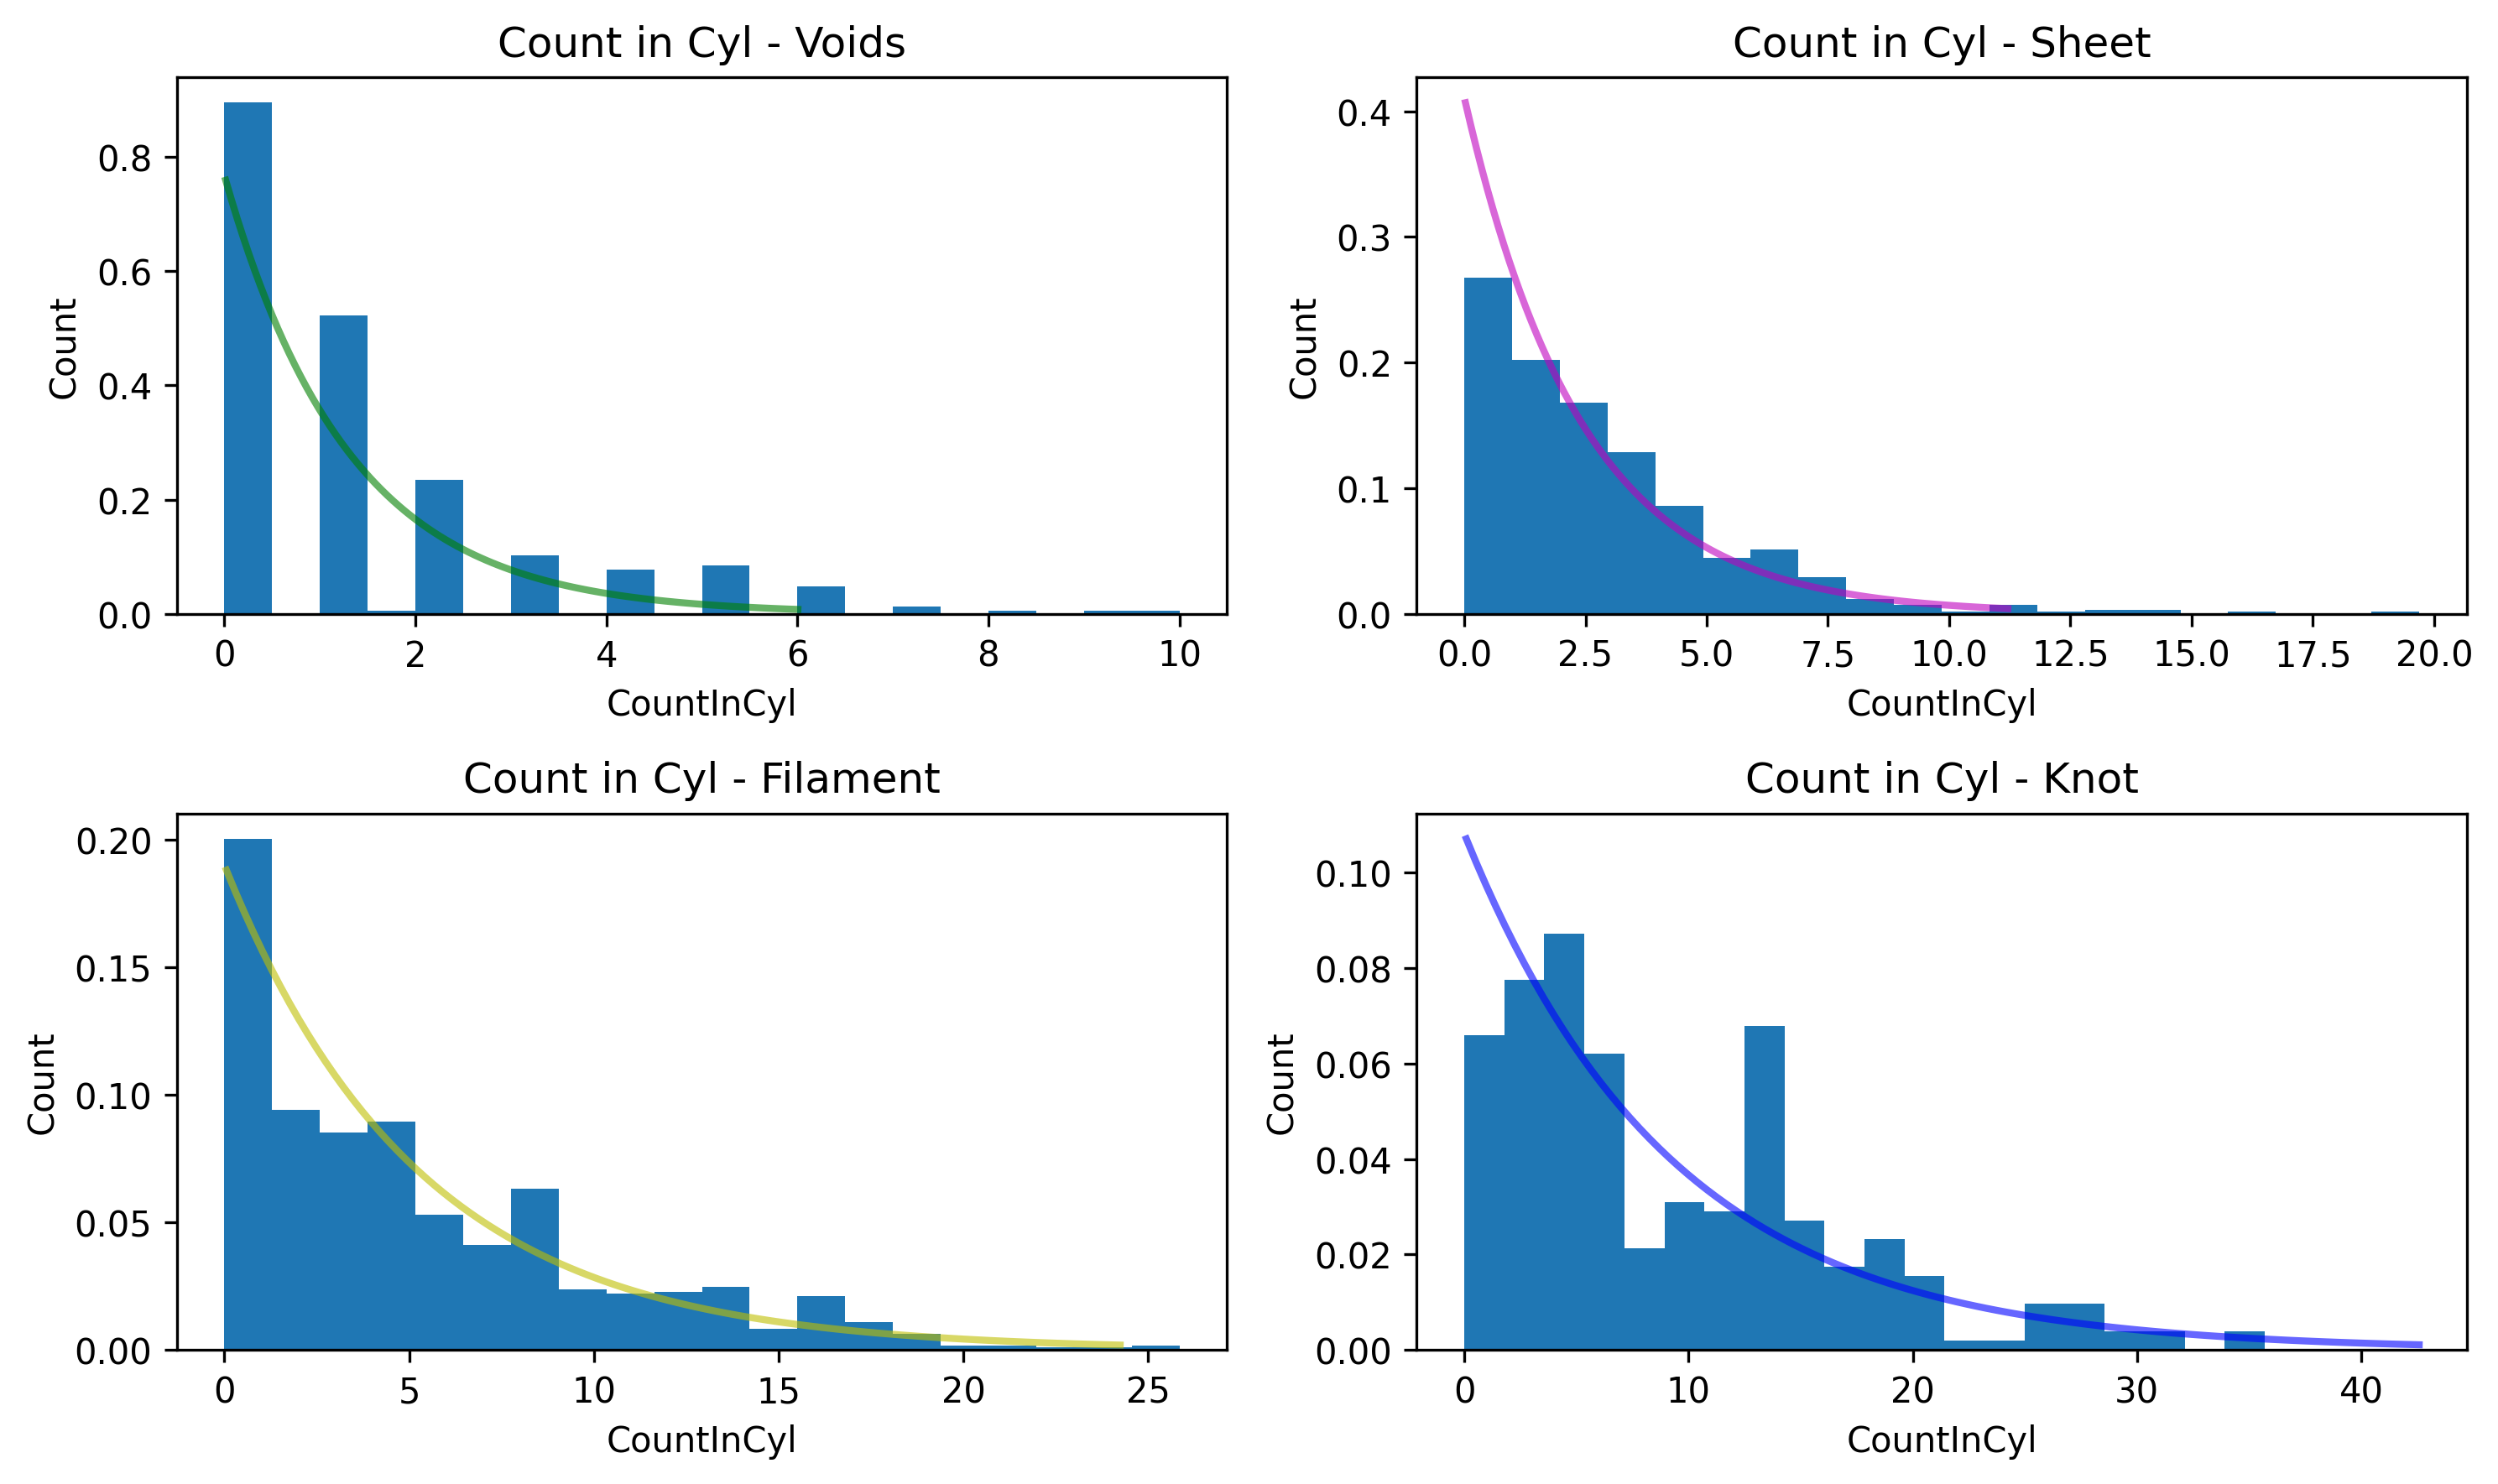

6.999837171638445 -1.0526102457315716 0.6198170118991718
4.643203378144029 -0.4978130419963471 0.5930003937635282
1.4326418032724035 0.19102530430623685 0.8312183958250359
1.6458516859142622 0.17355397915607462 0.4433418258625018


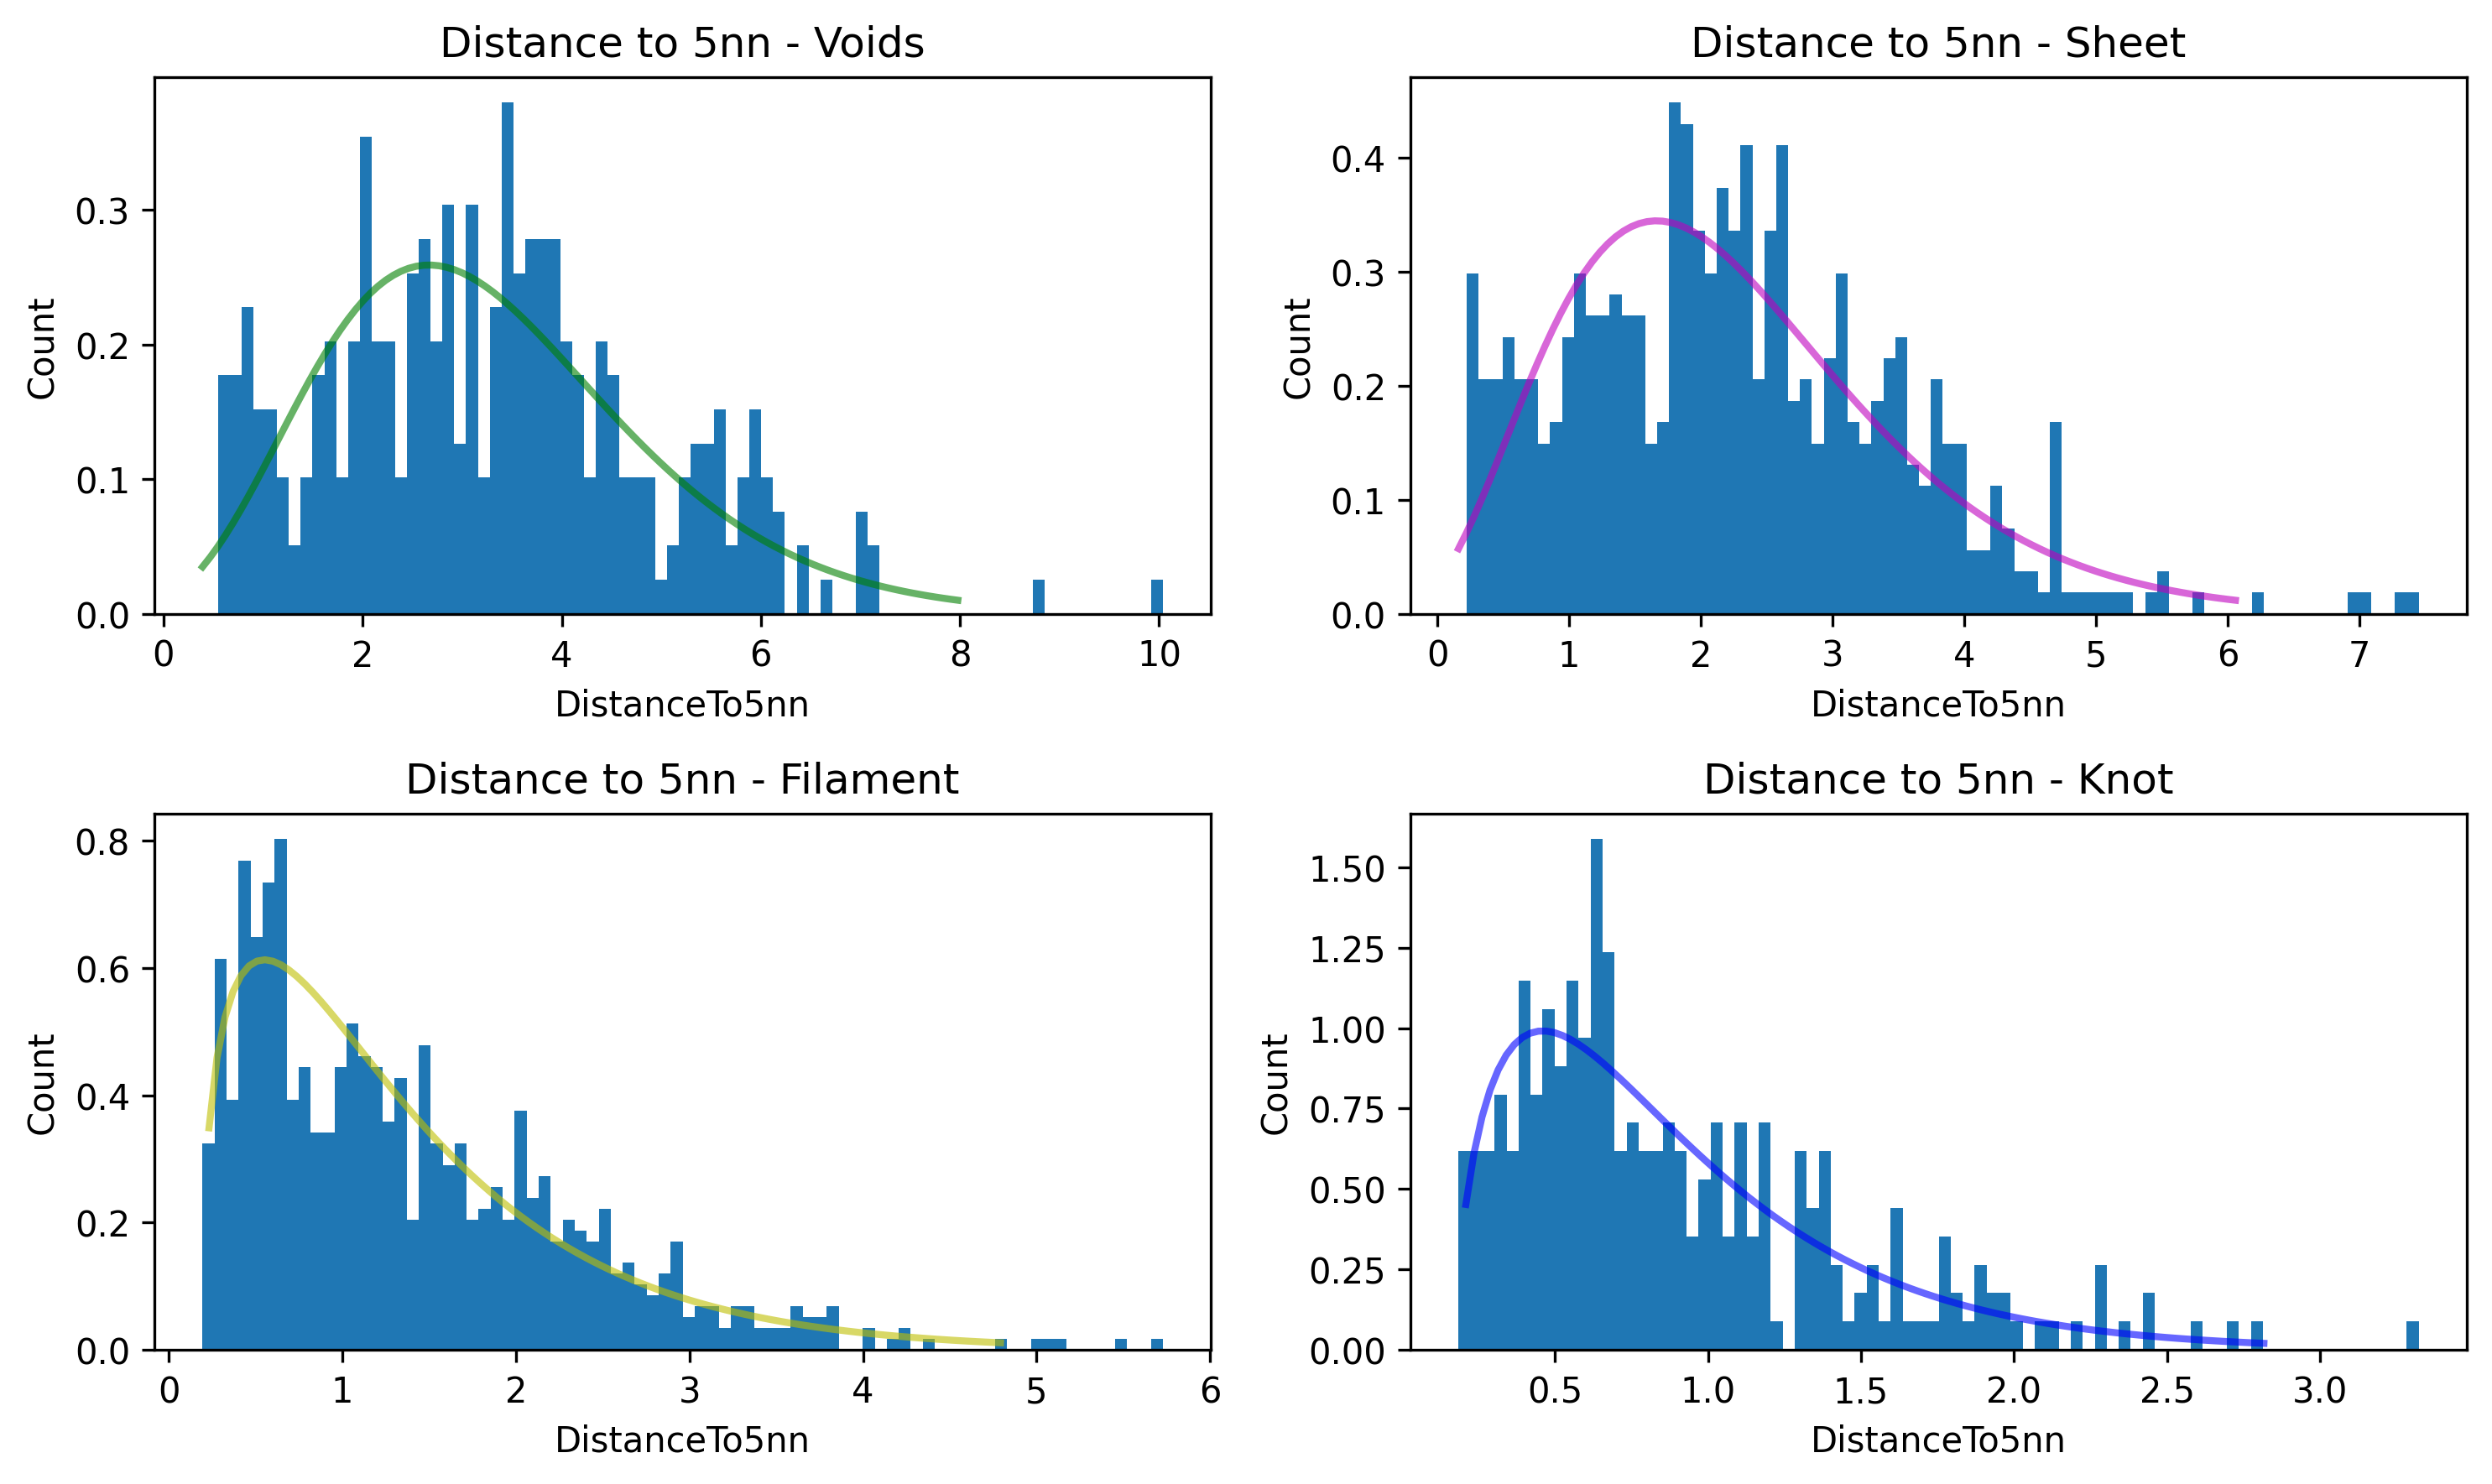

Max : 9.752
Min : 0.003


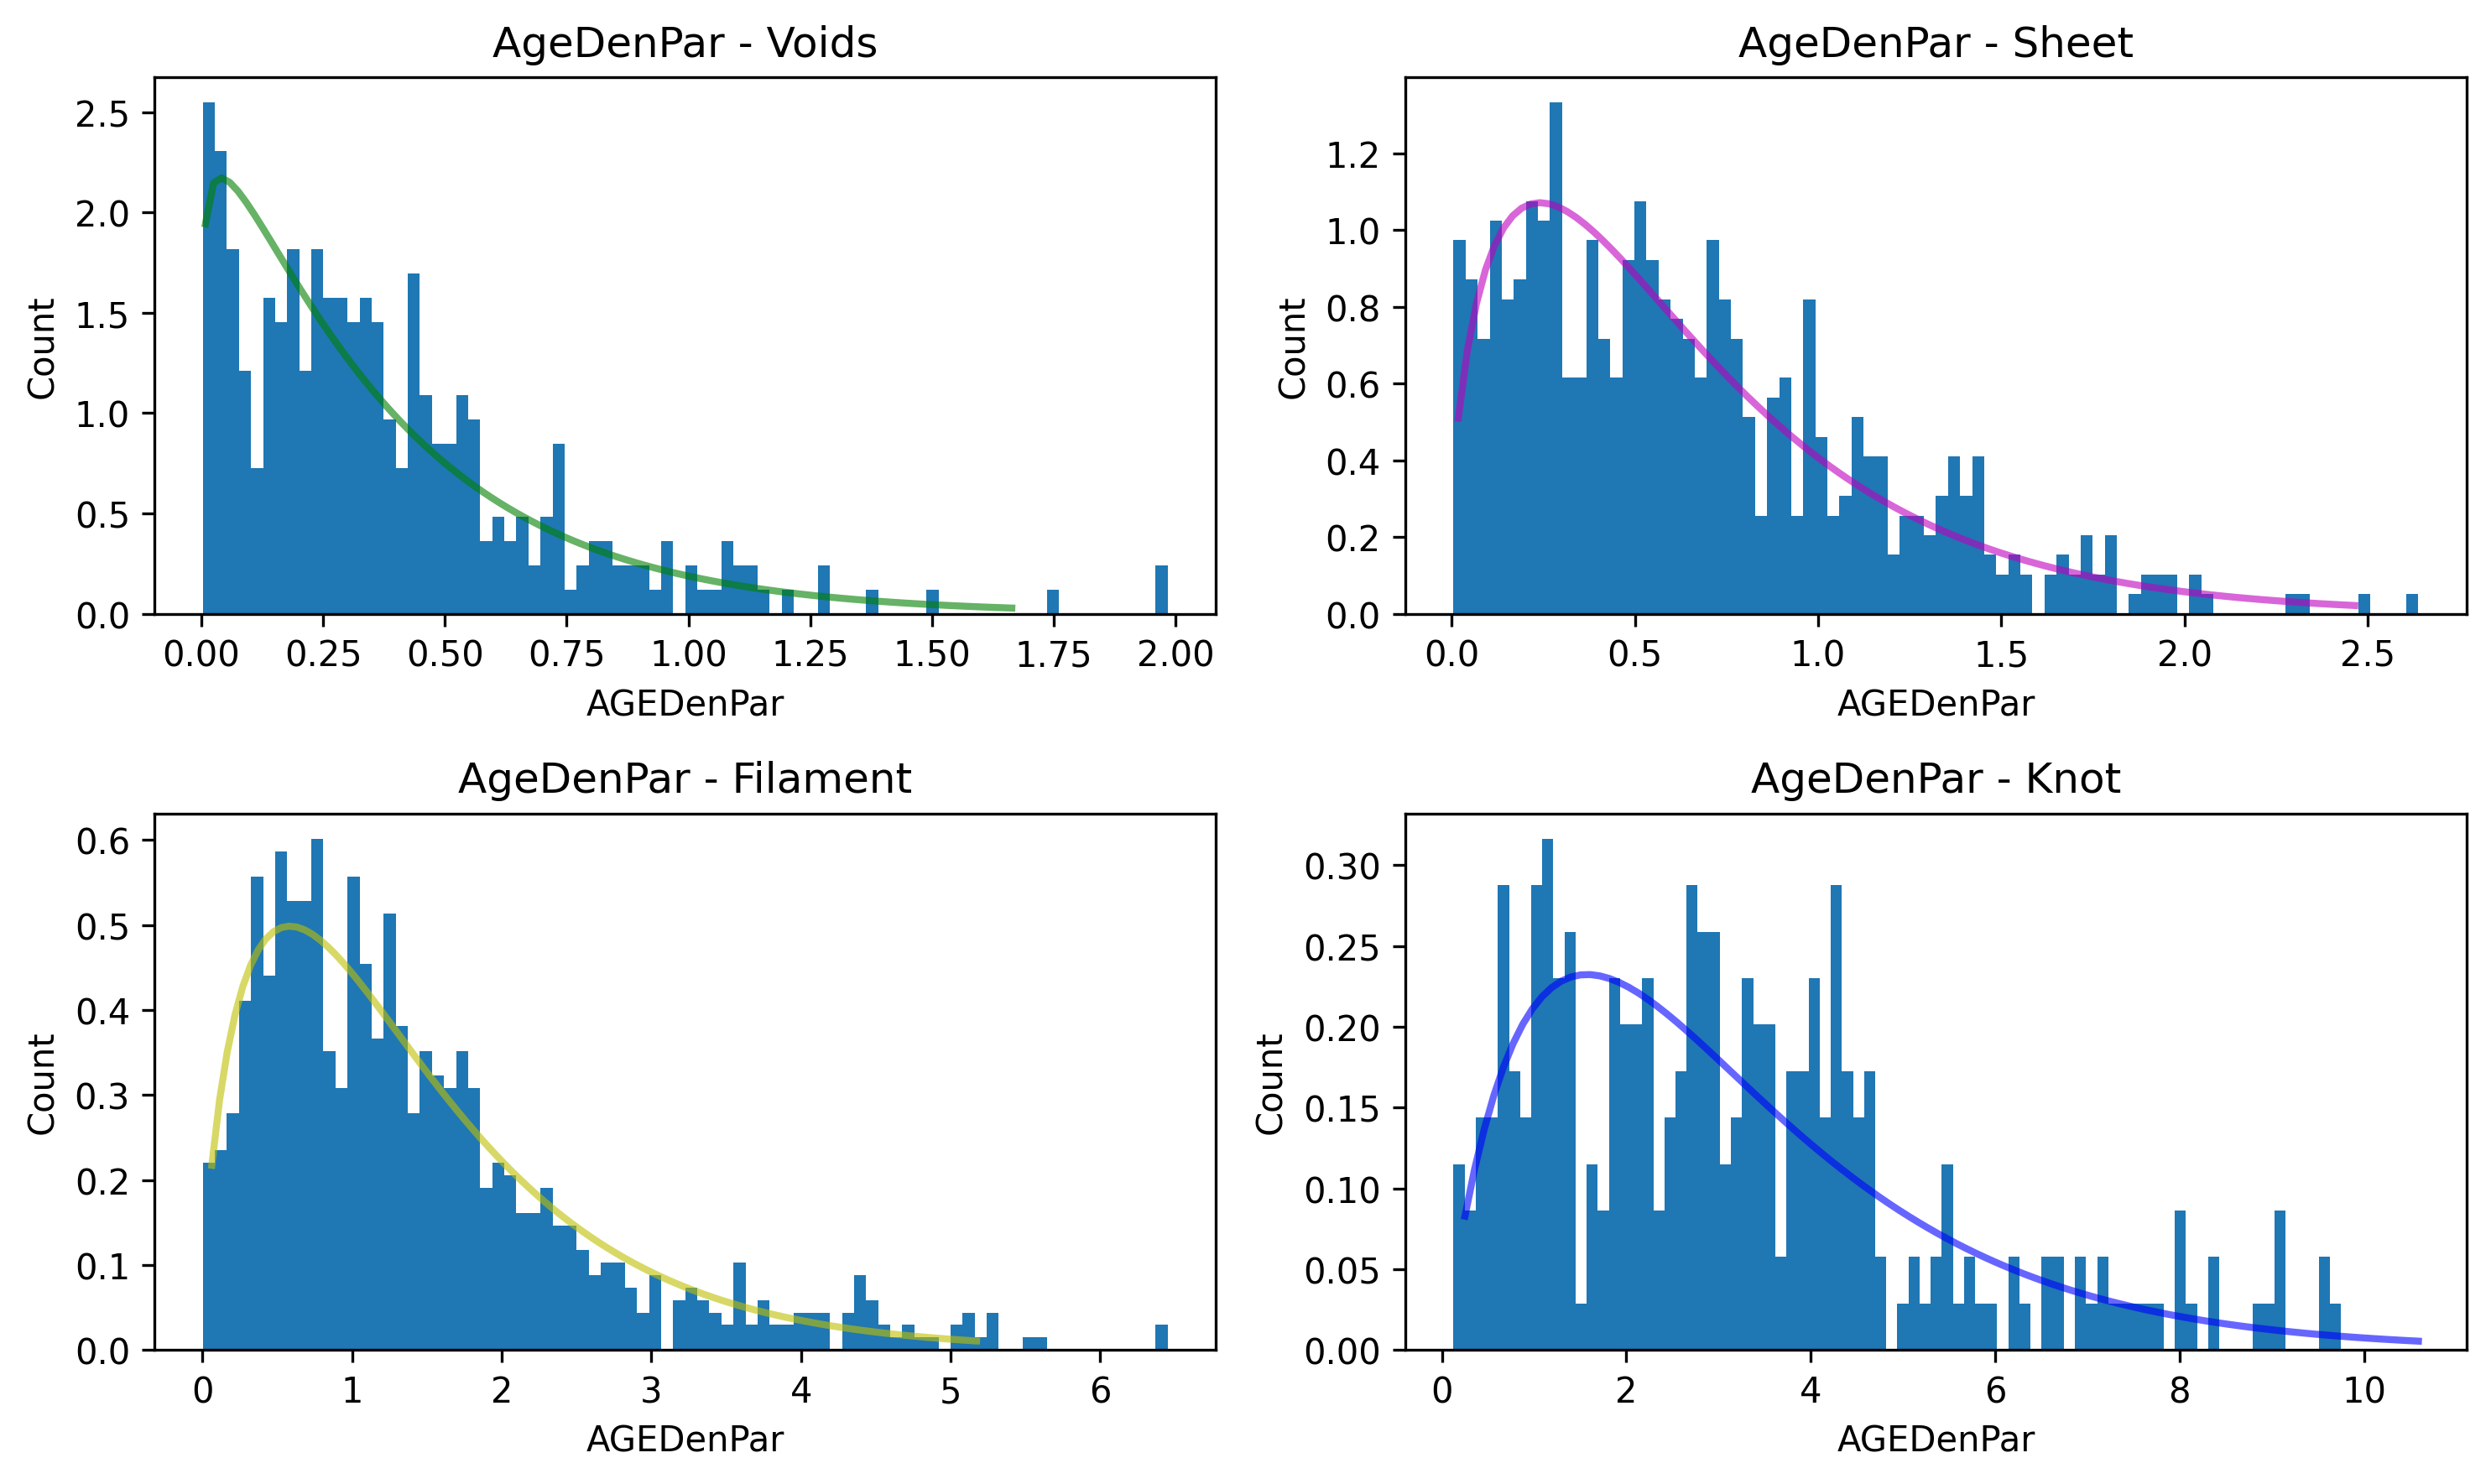

Max : 5.312
Max : 32.663
Max : 45.472
Max : 49.838


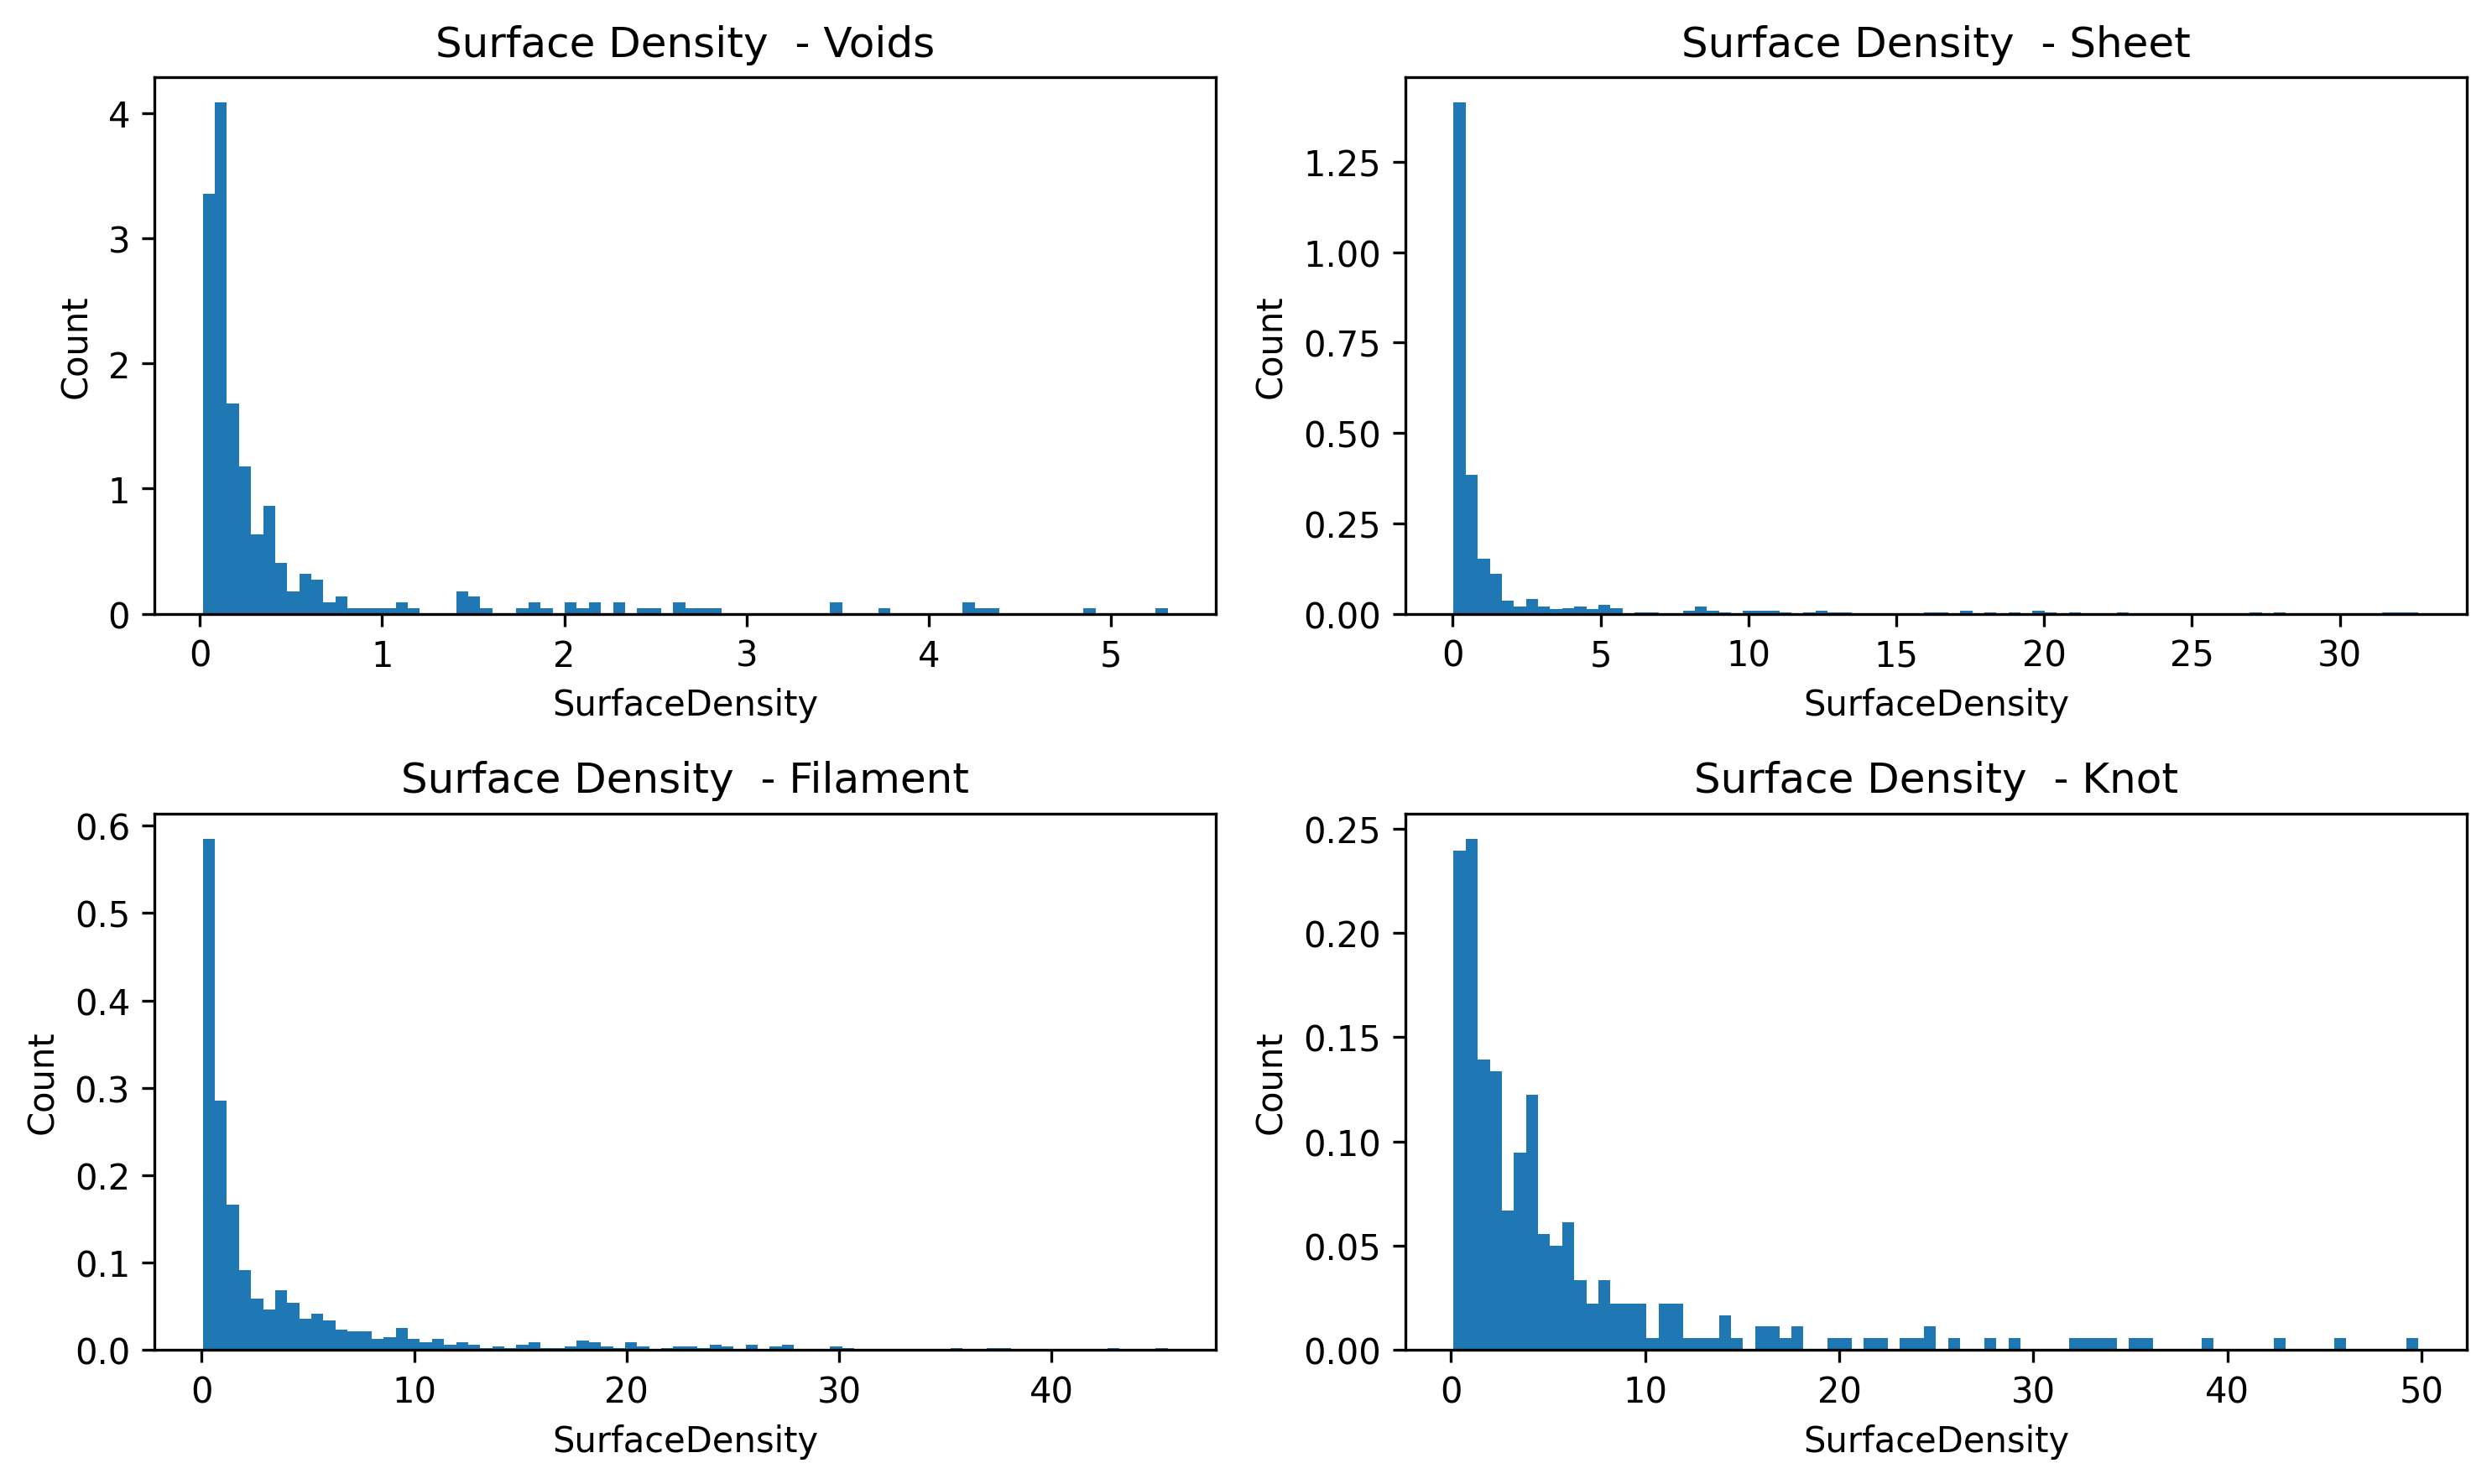

Max : 35.692
Min : 0.0
MAx : 10.0
pareto 1.4481929518015402 -0.6618010518357424 0.661801022667482
MAx : 19.692
pareto 1.1617622104217036 -1.271862207227295 1.2718619853443784
MAx : 25.846
pareto 0.8302760441477939 -1.528528280043432 1.5285277356884


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


IndexError: index 2 is out of bounds for axis 1 with size 2

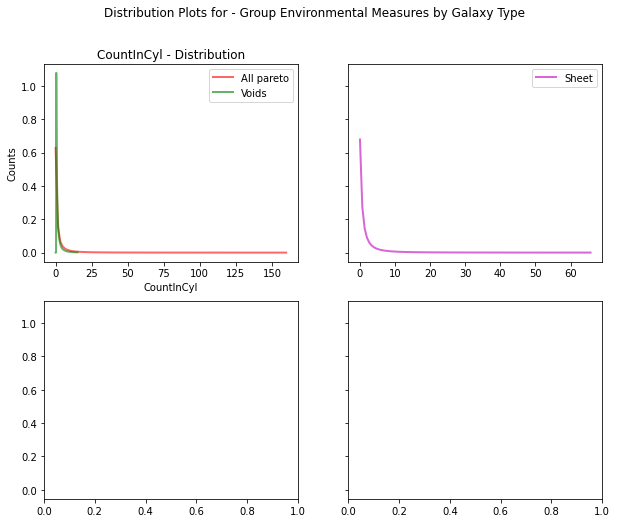

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy import stats

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
print(len(RErange))
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
print(len(RErange))
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
print('Before SD '+str(len(RErange)))
RErange = RErange[RErange['SurfaceDensity'] < 50]
print('After SD '+str(len(RErange)))
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alphaVal = .3

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
cols = ['g-','m-','y-','b-']
    


xfield = 'CountInCyl'
fig = plt.figure(figsize=(10, 6), dpi=300)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

for i, t in enumerate(types,1) :
    ax5 = fig.add_subplot(2, 2, i)
    ax5.title.set_text('Count in Cyl - '+t[1])
    ax5.set_ylabel('Count')
    ax5.set_xlabel(xfield)
    subrange = RErange[RErange['GeoS4'] == t[0]]
    ae, be = stats.expon.fit(subrange[xfield].data)
    xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
    xe = np.linspace(xe0,xe1,100)
    ax5.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),cols[t[0]], lw=2, alpha=0.6, label=t[1])
    #ax5.hist(subrange[xfield],bins=binCount,density=True)
    ax5.hist(subrange[xfield],bins=20,density=True)
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-CountInCyl_Histogram_and_Fit.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield = 'DistanceTo5nn'
fig = plt.figure(figsize=(10, 6), dpi=300)

for i, t in enumerate(types,1) :
    ax6 = fig.add_subplot(2, 2, i)
    ax6.title.set_text('Distance to 5nn - '+t[1])
    ax6.set_ylabel('Count')
    ax6.set_xlabel(xfield)
    subrange = RErange[RErange['GeoS4'] == t[0]]
    #print(subrange)
    ag, bg, cg =stats.gamma.fit(subrange[xfield])
    print(ag, bg, cg)
    xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
    xg = np.linspace(xg0,xg1, 100)
    ax6.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),cols[t[0]], lw=2, alpha=0.6, label=t[1])
    ax6.hist(subrange[xfield],bins=binCount,density=True)
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-DistanceTo5nn_Histogram_and_Fit.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield = 'AGEDenPar'
fig = plt.figure(figsize=(10, 6), dpi=300)

print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))


for i, t in enumerate(types,1) :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    ax7 = fig.add_subplot(2, 2, i)
    ax7.title.set_text('AgeDenPar - '+t[1])
    ax7.set_ylabel('Count')
    ax7.set_xlabel(xfield)
    ag, bg, cg = stats.gamma.fit(subrange[xfield].data)
    xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
    xg = np.linspace(xg0,xg1,100)
    ax7.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),cols[t[0]], lw=2, alpha=0.6, label=t[1])
    ax7.hist(subrange[xfield],bins=binCount,density=True)
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-AGEDenPar_Histogram_and_Fit.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield = 'SurfaceDensity'
fig = plt.figure(figsize=(10, 6), dpi=300)
for i,t in enumerate(types,1) :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    ax8 = fig.add_subplot(2, 2, i)
    ax8.title.set_text('Surface Density  - '+t[1])
    ax8.set_ylabel('Count')
    ax8.set_xlabel(xfield)
    print('Max : '+str(max(subrange[xfield].data)))
    #asp, bsp, csp = stats.pareto.fit(subrange[xfield].data)
    #print('pareto '+str(asp)+' '+str(bsp)+' '+str(csp))
    #xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
    #xsp = np.linspace(xsp0,xsp1,100)
    #if t[0] <= 2 :
    #   #ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),cols[t[0]], lw=2, alpha=0.6, label=t[1])
    #   ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=1),cols[t[0]], lw=2, alpha=0.6, label=t[1])
    ax8.hist(subrange[xfield],bins=binCount,density=True)
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GalaxyTypes-SurfaceDensity.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfields = ['CountInCyl','Distanceto5nn','AGEDenPar','SurfaceDensity']
fig, axes = plt.subplots(2,2,figsize=(10, 8), sharey=True) 
fig.suptitle('Distribution Plots for - Group Environmental Measures by Galaxy Type')
i = 0
j = 0
for xfield in xfields :
    axes[i,j].title.set_text(xfield+' - Distribution')
    axes[i,j].set_ylabel('Counts')
    axes[i,j].set_xlabel(xfield)
    print('Max : '+str(max(RErange[xfield])))
    print('Min : '+str(min(RErange[xfield])))

    #v = stats.pareto.fit(RErange1[xfield].data)
    #print(len(v))
    asp, bsp, csp = stats.pareto.fit(RErange[xfield].data)
    xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
    xsp = np.linspace(xsp0,xsp1,100)

    axes[i,j].plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),'r-', lw=2, alpha=0.6, label='All pareto')
    #ax8.plot(xag, stats.gamma.pdf(xs, aas, loc=bs, scale = cs),'r-', lw=2, alpha=0.6, label='gamma pdf')
    for t in types :
        subrange = RErange[RErange['GeoS4'] == t[0]]
        print('MAx : '+str(max(subrange[xfield].data)))
        asp, bsp, csp = stats.pareto.fit(subrange[xfield].data)
        print('pareto '+str(asp)+' '+str(bsp)+' '+str(csp))
        xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
        xsp = np.linspace(xsp0,xsp1,100)
        if t[0] <= 2 :
            #ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),cols[t[0]], lw=2, alpha=0.6, label=t[1])
            axes[i,j].plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=1),cols[t[0]], lw=2, alpha=0.6, label=t[1])

        axes[i,j].legend()
        j += 1
        if j == 3 :
           i += 1
           j = 0
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GalaxyTypes-EnviromentPlots.png', dpi=300, bbox_inches='tight')                      
plt.show()
    


